In [1]:
import py_boost

import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import numpy as np

init_notebook_mode(connected=True)


def get_results(model):
    return list(np.array(model.history).reshape(len(model.history)))

In [2]:
## Higgs dataset

import pandas as pd

df = pd.read_csv('HIGGS.csv', nrows=1000000)
df.columns = ['label', 'lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']
df["label"] = df["label"].apply(int)

In [3]:
X = df.iloc[:, 1:].to_numpy()
y = df['label'].to_numpy()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X_std = sc.fit_transform(X)

X_t, X_test, y_t, y_test = train_test_split(X_std, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.20, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(640000, 28) (160000, 28) (200000, 28)
(640000,) (160000,) (200000,)


In [5]:
from py_boost import GradientBoosting

eval_sets=[{'X': X_val, 'y': y_val},]

from datetime import datetime

start_time = datetime.now()

model = GradientBoosting('bce', metric='bce', ntrees=1000, es=200, verbose=10)
model.fit(X_train, y_train, eval_sets = eval_sets)

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

[18:34:58] Stdout logging level is INFO.
[18:34:58] GDBT train starts. Max iter 1000, early stopping rounds 200
[18:34:58] Iter 0; Sample 0, BCE = 0.6825759183983972; 
[18:34:58] Iter 10; Sample 0, BCE = 0.6259050786222926; 
[18:34:58] Iter 20; Sample 0, BCE = 0.5968670184840213; 
[18:34:58] Iter 30; Sample 0, BCE = 0.5794583427229738; 
[18:34:59] Iter 40; Sample 0, BCE = 0.5672767724368181; 
[18:34:59] Iter 50; Sample 0, BCE = 0.5585948543977038; 
[18:34:59] Iter 60; Sample 0, BCE = 0.552557287795216; 
[18:34:59] Iter 70; Sample 0, BCE = 0.5480765921097606; 
[18:34:59] Iter 80; Sample 0, BCE = 0.5444618883824023; 
[18:35:00] Iter 90; Sample 0, BCE = 0.5414116155999508; 
[18:35:00] Iter 100; Sample 0, BCE = 0.5390944401289766; 
[18:35:00] Iter 110; Sample 0, BCE = 0.5371200981448124; 
[18:35:00] Iter 120; Sample 0, BCE = 0.5352148579841268; 
[18:35:00] Iter 130; Sample 0, BCE = 0.5336604392875691; 
[18:35:01] Iter 140; Sample 0, BCE = 0.532283345428513; 
[18:35:01] Iter 150; Sample 0, 

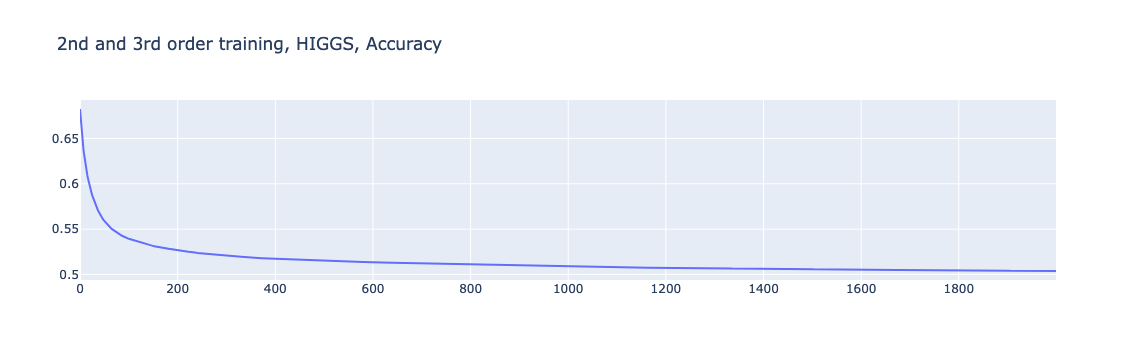

In [18]:
import plotly.graph_objects as go

y_results = get_results(model)
xs = [i for i in range(len(y))]

fig = go.Figure(layout_title_text="2nd and 3rd order training, HIGGS, Accuracy")
fig.add_trace(go.Scatter(x=xs, y=y_results,
                    mode='lines',
                    name='2nd order'))

fig.show()

py_boost

[09:19:51] Iter 0; Sample 0, BCE = 0.6825676974625489; 
[09:19:56] Iter 250; Sample 0, BCE = 0.5234004926036604; 
[09:20:02] Iter 500; Sample 0, BCE = 0.5147391333343267; 
[09:20:07] Iter 750; Sample 0, BCE = 0.5110623324883335; 
[09:20:13] Iter 1000; Sample 0, BCE = 0.5084163174932373; 
[09:20:19] Iter 1250; Sample 0, BCE = 0.5068451565175365; 
[09:20:24] Iter 1500; Sample 0, BCE = 0.5056167449047289; 
[09:20:30] Iter 1750; Sample 0, BCE = 0.5049102246708844; 
[09:20:36] Iter 2000; Sample 0, BCE = 0.5042344851894531; 
[09:20:42] Iter 2250; Sample 0, BCE = 0.5036050858321723; 
[09:20:48] Iter 2500; Sample 0, BCE = 0.5032531760587517; 
[09:20:53] Iter 2750; Sample 0, BCE = 0.5031878986618578; 
[09:20:59] Iter 3000; Sample 0, BCE = 0.5028072249011198; 
[09:21:05] Iter 3250; Sample 0, BCE = 0.5026451209522218; 
[09:21:11] Iter 3500; Sample 0, BCE = 0.5024639011691008; 
[09:21:16] Iter 3750; Sample 0, BCE = 0.5024481960326451; 
[09:21:18] Early stopping at iter 3814, best iter 3614, best_score 0.5024130492893115

time to 3000 iterations: 1'08''

X_py_boost

[09:26:03] Iter 0; Sample 0, BCE = 0.6825363270138884; 
[09:26:10] Iter 250; Sample 0, BCE = 0.5233027435636092; 
[09:26:17] Iter 500; Sample 0, BCE = 0.5147125407323216; 
[09:26:24] Iter 750; Sample 0, BCE = 0.5114515023712144; 
[09:26:31] Iter 1000; Sample 0, BCE = 0.5085719836910348; 
[09:26:38] Iter 1250; Sample 0, BCE = 0.5065026885527137; 
[09:26:45] Iter 1500; Sample 0, BCE = 0.5054417062751839; 
[09:26:53] Iter 1750; Sample 0, BCE = 0.5042685575231683; 
[09:27:00] Iter 2000; Sample 0, BCE = 0.5039230826268185; 
[09:27:07] Iter 2250; Sample 0, BCE = 0.5034971609943388; 
[09:27:14] Iter 2500; Sample 0, BCE = 0.5029771246317907; 
[09:27:22] Iter 2750; Sample 0, BCE = 0.5027725257611585; 
[09:27:29] Iter 3000; Sample 0, BCE = 0.5026766878664782; 
[09:27:36] Iter 3250; Sample 0, BCE = 0.5024784647206957; 
[09:27:44] Iter 3500; Sample 0, BCE = 0.5024292320131403; 
[09:27:51] Iter 3750; Sample 0, BCE = 0.502315580182972; 
[09:27:58] Iter 4000; Sample 0, BCE = 0.502234846174228; 
[09:28:06] Iter 4250; Sample 0, BCE = 0.5020963099166266;

time to 3000 iterations: 1'26''


In [22]:
print(f"Execution time of X_py_boost for an equivalent py_boost training: {86/68 * 100} %")

Execution time of X_py_boost for an equivalent py_boost training: 126.47058823529412 %
